#### Author: Fagbamigbe Kehinde
Twitter: @bornofdata

> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# import statements for all of the packages that I plan to use.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
sns.set_style('darkgrid')


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
pwd

'/kaggle/working'

[Link](https://www.census.gov/quickfacts/gunbarrelcitycitytexas) to dataset

Some estimates presented here come from sample data, and thus have sampling errors that may render some apparent differences between geographies statistically indistinguishable. Click the Quick Info  icon to the left of each row in TABLE view to learn about sampling error.

The vintage year (e.g., V2021) refers to the final year of the series (2020 thru 2021). Different vintage years of estimates are not comparable.

Users should exercise caution when comparing 2017-2021 ACS 5-year estimates to other ACS estimates. For more information, please visit the 2021 5-year ACS Comparison Guidance page.

Fact Notes
(a)Includes persons reporting only one race
(c)Economic Census - Puerto Rico data are not comparable to U.S. Economic Census data
(b)Hispanics may be of any race, so also are included in applicable race categories
Value Flags
-Either no or too few sample observations were available to compute an estimate, or a ratio of medians cannot be calculated because one or both of the median estimates falls in the lowest or upper interval of an open ended distribution.
FFewer than 25 firms
DSuppressed to avoid disclosure of confidential information
NData for this geographic area cannot be displayed because the number of sample cases is too small.
FNFootnote on this item in place of data
XNot applicable
SSuppressed; does not meet publication standards
NANot available
ZValue greater than zero but less than half unit of measure shown
QuickFacts data are derived from: Population Estimates, American Community Survey, Census of Population and Housing, Current Population Survey, Small Area Health Insurance Estimates, Small Area Income and Poverty Estimates, State and County Housing Unit Estimates, County Business Patterns, Nonemployer Statistics, Economic Census, Survey of Business Owners, Building Permits.

### Gun data

Here is a [link](https://www.fbi.gov/file-repository/nics_firearm_checks_-_month_year_by_state_type.pdf/view) to the description of firearms



Each column represents the type of transaction submitted to the **National Instant Criminal Background Check System (NICS)**. In addition, each type of transaction is broken down by the type of firearm—handgun, long gun, and other. The types of firearms are defined by the **Bureau of Alcohol, Tobacco, Firearms and Explosives** as follows:

- Handgun—(a) any firearm which has a short stock and is designed to be held and fired by the use of a single hand; and (b) any combination of parts from which a firearm described in paragraph (a) can be assembled.

- Long Gun—a weapon designed or redesigned, made or remade, and intended to be fired from the shoulder, and designed or redesigned and made or remade to use the energy of the explosive in (a) a fixed metallic cartridge to fire a single projectile through a rifled bore for each single pull of the trigger; or (b) a fixed shotgun shell to fire through a smooth bore either
a number of ball shot or a single projectile for each single pull of the trigger.

- Other—refers to frames, receivers, and other firearms that are neither handguns nor long guns (rifles or shotguns), such as firearms having a pistol grip that expel a shotgun shell, or National Firearms Act firearms, including silencers.

The transaction types indicated in yellow on the chart are for background checks initiated by an officially-licensed **Federal Firearms Licensee** (FFL) or criminal justice/law enforcement agency prior to the issuance of a firearm-related permit or transfer. 


The indication of **“multiple”** denotes a background check where more than one type of firearm is associated to a single
background check.

**“Admin”** denotes the administrative checks that are for other authorized uses of the NICS.

Other types of transactions are explained below:

- Pre-Pawn—background checks requested by an officially-licensed FFL on prospective firearm transferees seeking to pledge or pawn a firearm as security for the payment or repayment of money, prior to actually pledging or pawning the firearm.

- Redemption—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to regain possession of a firearm after pledging or pawning a firearm as security at a pawn shop.

- Returned/Disposition—background checks requested by criminal justice/law enforcement agencies prior to returning a firearm in its possession to the respective transferee, to ensure the individual is not prohibited.

- Rentals—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm when the firearm is loaned or rented for use off the premises of the business.

- Private Sale—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.

- Return to Seller-Private Sale—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.

It is important to note that the statistics within this chart represent the number of firearm background checks initiated through the NICS. They do not represent the number of firearms sold. Based on varying state laws and purchase scenarios, a one-to-one correlation cannot be made between a firearm background check and a firearm sale.

- month
- state
- permit
- permit_recheck
- handgun
- long_gun
- other
- multiple
- admin
- prepawn_handgun
- prepawn_long_gun
- prepawn_other
- redemption_handgun
- redemption_long_gun
- redemption_other
- returned_handgun 
- returned_long_gun
- returned_other 
- rentals_handgun
- rentals_long_gun
- private_sale_handgun 
- private_sale_long_gun
- private_sale_other
- return_to_seller_handgun
- return_to_seller_long_gun
- return_to_seller_other
- totals

## US Census data and Categories

The data in the US Census data is classified under different categories as seen below

- Population
- Age and Sex
- Race and Hispanic Origin
- Population Characteristics
- Housing
- Families & Living Arrangements
- Computer and Internet Use
- Education
- Health
- Economy
- Transportation
- Income & Poverty
- Businesses
- Geography

In [3]:
for dirname, _, filenames in os.walk('/kaggle/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/src/script.ipynb
/kaggle/lib/kaggle/gcp.py
/kaggle/input/gundata/gun-data.xlsx
/kaggle/input/uscensus/u.s.-census-data.csv
/kaggle/working/__notebook__.ipynb


In [4]:
gun_data = pd.read_excel('/kaggle/input/gundata/gun-data.xlsx')
gun_data.head(3)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394


In [5]:
us_census = pd.read_csv('/kaggle/input/uscensus/u.s.-census-data.csv')
us_census.head(3)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%


In [6]:
gun_data.shape

(12485, 27)

In [7]:
us_census.shape

(85, 52)

In [8]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

### Checking for the datatypes and the null values

In [9]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

### Columns for the data

In [10]:
# class column_names:
#     def __init__(self, df):
#         self.df = df
    
#     def colnames():
#         for columns in df.columns:
#             print(column)
            
    
# x = column_names(gun_data)
# x.colnames()
    

In [11]:
# for gun data

gun_data.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [12]:
# for the us census data I will be doing a transpose to have the states as rows inorde to join with the state column of the gun violence data

### Check for missing / null values

In [13]:
gun_data.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [14]:
us_census.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

### checking for duplicates in the data

In [15]:
gun_data.duplicated().sum()

0

In [16]:
us_census.duplicated().sum()

3

### Removing Duplicates

In [17]:
us_census.drop_duplicates(inplace = True)

In [18]:
us_census.duplicated().sum()

0

In [19]:
gun_data['state'].nunique()

55

In [20]:
gun_data['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

#### USA has 50 state as seen from [here](https://www.nationsonline.org/oneworld/US-states-by-area.htm)

In [21]:
not_us = ['District of Columbia','Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands']
not_us

['District of Columbia',
 'Guam',
 'Mariana Islands',
 'Puerto Rico',
 'Virgin Islands']

## Dropping a column

In [22]:
us_census.drop('Fact Note', axis = 1, inplace = True)
us_census.head(2)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


### Transposing the data structure

In [23]:
us_cens_colnames = us_census.columns
us_cens_colnames

Index(['Fact', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [24]:
us_states = us_cens_colnames[[us_census.columns != 'Fact']]
us_states

/opt/conda/lib/python3.7/site-packages/pandas/core/indexes/base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [25]:
new_col = us_census['Fact'].unique()
new_col

array(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V20

In [26]:
us_census.shape

(82, 51)

In [27]:
new_us_census = us_census.transpose()   #us_census.T can also be used
new_us_census.head(3)

,0,1,2,3,4,5,6,7,8,9,...,74,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,(c),Value Flags,-,D,F,FN,NaN,S,X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
us_census = new_us_census.iloc[:,:64]
us_census.head(4)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"451,951","499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08"


In [29]:
us_census.columns = us_census.iloc[0]
us_census.head(3)

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"


In [30]:
us_census.drop(us_census.index[0], inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
us_census.head(2)

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"


In [32]:
us_census.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [33]:
len(us_census.index)

50

In [34]:
us_census.reset_index(inplace = True)

### Renaming Column name

In [35]:
us_census.columns[:5]

Index(['index', 'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010'],
      dtype='object', name='Fact')

In [36]:
us_census.rename(columns = {'index': 'state'}, inplace = True, errors='ignore' )

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
us_census.head(2)

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"


In [38]:
## can aslo be used for pivoting
#pd.wide_to_long(us_census, i = us_states, )
# new = us_census.pivot(index = us_states, columns = new_col)
# new.head(5)

In [39]:
us_census['state'].count()

50

In [40]:
us_census.head(2)

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"


In [41]:
us_census.dtypes

Fact
state                                                                                    object
Population estimates, July 1, 2016,  (V2016)                                             object
Population estimates base, April 1, 2010,  (V2016)                                       object
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    object
Population, Census, April 1, 2010                                                        object
                                                                                          ...  
Nonminority-owned firms, 2012                                                            object
Veteran-owned firms, 2012                                                                object
Nonveteran-owned firms, 2012                                                             object
Population per square mile, 2010                                                         object
Land area in square miles, 2010    

In [42]:
gun_data.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [43]:
us_census.dtypes

Fact
state                                                                                    object
Population estimates, July 1, 2016,  (V2016)                                             object
Population estimates base, April 1, 2010,  (V2016)                                       object
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    object
Population, Census, April 1, 2010                                                        object
                                                                                          ...  
Nonminority-owned firms, 2012                                                            object
Veteran-owned firms, 2012                                                                object
Nonveteran-owned firms, 2012                                                             object
Population per square mile, 2010                                                         object
Land area in square miles, 2010    

In [44]:
gun_data['state']

0              Alabama
1               Alaska
2              Arizona
3             Arkansas
4           California
             ...      
12480         Virginia
12481       Washington
12482    West Virginia
12483        Wisconsin
12484          Wyoming
Name: state, Length: 12485, dtype: object

In [45]:
us_census['state']

0            Alabama
1             Alaska
2            Arizona
3           Arkansas
4         California
5           Colorado
6        Connecticut
7           Delaware
8            Florida
9            Georgia
10            Hawaii
11             Idaho
12          Illinois
13           Indiana
14              Iowa
15            Kansas
16          Kentucky
17         Louisiana
18             Maine
19          Maryland
20     Massachusetts
21          Michigan
22         Minnesota
23       Mississippi
24          Missouri
25           Montana
26          Nebraska
27            Nevada
28     New Hampshire
29        New Jersey
30        New Mexico
31          New York
32    North Carolina
33      North Dakota
34              Ohio
35          Oklahoma
36            Oregon
37      Pennsylvania
38      Rhode Island
39    South Carolina
40      South Dakota
41         Tennessee
42             Texas
43              Utah
44           Vermont
45          Virginia
46        Washington
47     West V

In [46]:
gun_data.shape

(12485, 27)

In [47]:
us_census.shape

(50, 65)


## Population


- Population estimates, July 1, 2016,  (V2016) - April 1, 2010,  (V2016)
- Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
- Population, Census, April 1, 2010


## Age and Sex
- Persons under 5 years, percent, July 1, 2016,  (V2016) - April 1, 2010
- Persons under 18 years, percent, July 1, 2016,  (V2016) - April 1, 2010
- Persons 65 years and over, percent,  July 1, 2016,  (V2016) - April 1, 2010
- Female persons, percent,  July 1, 2016,  (V2016) - April 1, 2010



## Race and Hispanic Origin
- White alone, percent, July 1, 2016,  (V2016)
- Black or African American alone, percent, July 1, 2016,  (V2016)
- American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)
- Asian alone, percent, July 1, 2016,  (V2016)
- Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)
- Two or More Races, percent, July 1, 2016,  (V2016)
- Hispanic or Latino, percent, July 1, 2016,  (V2016)
- White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)


## Families & Living Arrangements
- Persons per household, 2011-2015
- Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015


## Education
- High school graduate or higher, percent of persons age 25 years+, 2011-2015
- Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015


## Health
- With a disability, under age 65 years, percent, 2011-2015


### Census Bureau-designated regions and divisions

- Region 1: Northeast
 - Division 1: New England (Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont)
 - Division 2: Middle Atlantic (New Jersey, New York, and Pennsylvania)
- Region 2: Midwest (Prior to June 1984, the Midwest Region was designated as the North Central Region.)[8]
 - Division 3: East North Central (Illinois, Indiana, Michigan, Ohio, and Wisconsin)
 - Division 4: West North Central (Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, and South Dakota)
- Region 3: South
 - Division 5: South Atlantic (Delaware; Florida; Georgia; Maryland; North Carolina; South Carolina; Virginia; Washington, D.C. and West Virginia)
 - Division 6: East South Central (Alabama, Kentucky, Mississippi, and Tennessee)
 - Division 7: West South Central (Arkansas, Louisiana, Oklahoma, and Texas)
- Region 4: West
 - Division 8: Mountain (Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, and Wyoming)
 - Division 9: Pacific (Alaska, California, Hawaii, Oregon, and Washington)


In [48]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
          'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming']

In [49]:
Northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']
Midwest = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
South = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'Washington', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
West = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']

In [50]:
gun_data['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [51]:
not_us = ['District of Columbia','Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands']
not_us

['District of Columbia',
 'Guam',
 'Mariana Islands',
 'Puerto Rico',
 'Virgin Islands']

In [52]:
Northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']
Midwest = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
South = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'Washington', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
West = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon']

In [53]:
Northeast, len(Northeast)

(['Connecticut',
  'Maine',
  'Massachusetts',
  'New Hampshire',
  'Rhode Island',
  'Vermont',
  'New Jersey',
  'New York',
  'Pennsylvania'],
 9)

In [54]:
Northeast
Midwest
South
West

['Arizona',
 'Colorado',
 'Idaho',
 'Montana',
 'Nevada',
 'New Mexico',
 'Utah',
 'Wyoming',
 'Alaska',
 'California',
 'Hawaii',
 'Oregon']

In [55]:
Midwest, len(Midwest)

(['Illinois',
  'Indiana',
  'Michigan',
  'Ohio',
  'Wisconsin',
  'Iowa',
  'Kansas',
  'Minnesota',
  'Missouri',
  'Nebraska',
  'North Dakota',
  'South Dakota'],
 12)

In [56]:
South, len(South)

(['Delaware',
  'Florida',
  'Georgia',
  'Maryland',
  'North Carolina',
  'South Carolina',
  'Virginia',
  'Washington',
  'West Virginia',
  'Alabama',
  'Kentucky',
  'Mississippi',
  'Tennessee',
  'Arkansas',
  'Louisiana',
  'Oklahoma',
  'Texas'],
 17)

In [57]:
West, len(West)

(['Arizona',
  'Colorado',
  'Idaho',
  'Montana',
  'Nevada',
  'New Mexico',
  'Utah',
  'Wyoming',
  'Alaska',
  'California',
  'Hawaii',
  'Oregon'],
 12)

In [58]:
len(Northeast) + len(Midwest) + len(South) + len(West)

50

In [59]:
len(states)

50

### Changing Datatype

In [60]:
us_census.dtypes

Fact
state                                                                                    object
Population estimates, July 1, 2016,  (V2016)                                             object
Population estimates base, April 1, 2010,  (V2016)                                       object
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    object
Population, Census, April 1, 2010                                                        object
                                                                                          ...  
Nonminority-owned firms, 2012                                                            object
Veteran-owned firms, 2012                                                                object
Nonveteran-owned firms, 2012                                                             object
Population per square mile, 2010                                                         object
Land area in square miles, 2010    

In [61]:
to_float = us_census.columns[1:]
to_float

Index(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V20

## Checking the type/class of the data

In [62]:
type(us_census)

pandas.core.frame.DataFrame

In [63]:
us_census.columns[0:2]

Index(['state', 'Population estimates, July 1, 2016,  (V2016)'], dtype='object', name='Fact')

In [64]:
# us_test = us_census.copy()
# us_test.head(2)

In [65]:
in_percentage = ['Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',            
'Persons under 5 years, percent, July 1, 2016,  (V2016)',
'Persons under 5 years, percent, April 1, 2010',
'Persons under 18 years, percent, July 1, 2016,  (V2016)',
'Persons under 18 years, percent, April 1, 2010',
'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
'Persons 65 years and over, percent, April 1, 2010',
'Female persons, percent,  July 1, 2016,  (V2016)',
'Female persons, percent, April 1, 2010',
'White alone, percent, July 1, 2016,  (V2016)',
'Black or African American alone, percent, July 1, 2016,  (V2016)',
'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
'Asian alone, percent, July 1, 2016,  (V2016)',
'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
'Two or More Races, percent, July 1, 2016,  (V2016)',
'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)',
'Foreign born persons, percent, 2011-2015',
'Owner-occupied housing unit rate, 2011-2015',
'Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015',
'Language other than English spoken at home, percent of persons age 5 years+, 2011-2015',
'High school graduate or higher, percent of persons age 25 years+, 2011-2015',
"Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015",
'With a disability, under age 65 years, percent, 2011-2015',
'Persons  without health insurance, under age 65 years, percent',
'In civilian labor force, total, percent of population age 16 years+, 2011-2015',
'In civilian labor force, female, percent of population age 16 years+, 2011-2015',
'Persons in poverty, percent',
'Total employment, percent change, 2014-2015'
                ]

In [66]:
in_percentage

['Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
 'Persons under 5 years, percent, July 1, 2016,  (V2016)',
 'Persons under 5 years, percent, April 1, 2010',
 'Persons under 18 years, percent, July 1, 2016,  (V2016)',
 'Persons under 18 years, percent, April 1, 2010',
 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
 'Persons 65 years and over, percent, April 1, 2010',
 'Female persons, percent,  July 1, 2016,  (V2016)',
 'Female persons, percent, April 1, 2010',
 'White alone, percent, July 1, 2016,  (V2016)',
 'Black or African American alone, percent, July 1, 2016,  (V2016)',
 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
 'Asian alone, percent, July 1, 2016,  (V2016)',
 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
 'Two or More Races, percent, July 1, 2016,  (V2016)',
 'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
 'White alone, not Hispanic or Lati

In [67]:
in_usd = ["Median value of owner-occupied housing units, 2011-2015",
"Median selected monthly owner costs -with a mortgage, 2011-2015",
"Median selected monthly owner costs -without a mortgage, 2011-2015",
"Median gross rent, 2011-2015",
"Total retail sales per capita, 2012",
"Median household income (in 2015 dollars), 2011-2015",
"Per capita income in past 12 months (in 2015 dollars), 2011-2015"
]

In [68]:
in_usd

['Median value of owner-occupied housing units, 2011-2015',
 'Median selected monthly owner costs -with a mortgage, 2011-2015',
 'Median selected monthly owner costs -without a mortgage, 2011-2015',
 'Median gross rent, 2011-2015',
 'Total retail sales per capita, 2012',
 'Median household income (in 2015 dollars), 2011-2015',
 'Per capita income in past 12 months (in 2015 dollars), 2011-2015']

In [69]:
# s_test = us_census.copy()
# s_test.head(2)

In [70]:
for i in in_percentage:
    us_census[i] = us_census[i].str.replace( "%", "")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [71]:
us_census.head(5)

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
0,Alabama,"4,863,300","4,780,131",1.70,"4,779,736",6.00,6.40,22.60,23.70,16.10,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
1,Alaska,"741,894","710,249",4.50,"710,231",7.30,7.60,25.20,26.40,10.40,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"
2,Arizona,"6,931,071","6,392,301",8.40,"6,392,017",6.30,7.10,23.50,25.50,16.90,...,"451,951","499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08"
3,Arkansas,"2,988,248","2,916,025",2.50,"2,915,918",6.40,6.80,23.60,24.40,16.30,...,"198,380","231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48"
4,California,"39,250,017","37,254,522",5.40,"37,253,956",6.30,6.80,23.20,25.00,13.60,...,"3,206,958","3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22"


In [72]:
us_census['Median value of owner-occupied housing units, 2011-2015'].head(4)

0    $125,500 
1    $250,000 
2    $167,500 
3    $111,400 
Name: Median value of owner-occupied housing units, 2011-2015, dtype: object

In [73]:
in_usd
for i in in_usd:
    us_census[i] = us_census[i].str.replace( "$", "")


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
us_census['Median value of owner-occupied housing units, 2011-2015'].head(4)

0    125,500 
1    250,000 
2    167,500 
3    111,400 
Name: Median value of owner-occupied housing units, 2011-2015, dtype: object

In [75]:
# for i in in_percentage:
#     s_test.rename(columns = {s_test[i].str: s_test[i].str +  str('%')}, inplace = True, errors='ignore')

In [76]:
us_census.head(4)

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
0,Alabama,"4,863,300","4,780,131",1.70,"4,779,736",6.00,6.40,22.60,23.70,16.10,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
1,Alaska,"741,894","710,249",4.50,"710,231",7.30,7.60,25.20,26.40,10.40,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"
2,Arizona,"6,931,071","6,392,301",8.40,"6,392,017",6.30,7.10,23.50,25.50,16.90,...,"451,951","499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08"
3,Arkansas,"2,988,248","2,916,025",2.50,"2,915,918",6.40,6.80,23.60,24.40,16.30,...,"198,380","231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48"


### Converting datatype from string to float

In [77]:
# new_test = us_census.copy()
# new_test.head(3)

In [78]:
import re
for c in to_float:
    us_census[c] = us_census[c].apply(lambda x: re.sub("\D", "", x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
us_census.head(3)

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
0,Alabama,4863300,4780131,170,4779736,600,640,2260,2370,1610,...,322025,374153,203604,137630,92219,272651,41943,316984,944,5064533
1,Alaska,741894,710249,450,710231,730,760,2520,2640,1040,...,55521,68032,35402,22141,13688,51147,7953,56091,12,57064095
2,Arizona,6931071,6392301,840,6392017,630,710,2350,2550,1690,...,451951,499926,245243,182425,135313,344981,46780,427582,563,11359408


In [80]:
us_census.dtypes

Fact
state                                                                                    object
Population estimates, July 1, 2016,  (V2016)                                             object
Population estimates base, April 1, 2010,  (V2016)                                       object
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    object
Population, Census, April 1, 2010                                                        object
                                                                                          ...  
Nonminority-owned firms, 2012                                                            object
Veteran-owned firms, 2012                                                                object
Nonveteran-owned firms, 2012                                                             object
Population per square mile, 2010                                                         object
Land area in square miles, 2010    

In [81]:
for c in to_float:
    us_census[c] = pd.to_numeric(us_census[c], errors = 'ignore')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
us_census.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
0,Alabama,4863300,4780131,170,4779736,600,640,2260,2370,1610,...,322025,374153,203604,137630,92219,272651,41943,316984,944,5064533
1,Alaska,741894,710249,450,710231,730,760,2520,2640,1040,...,55521,68032,35402,22141,13688,51147,7953,56091,12,57064095
2,Arizona,6931071,6392301,840,6392017,630,710,2350,2550,1690,...,451951,499926,245243,182425,135313,344981,46780,427582,563,11359408
3,Arkansas,2988248,2916025,250,2915918,640,680,2360,2440,1630,...,198380,231959,123158,75962,35982,189029,25915,192988,56,5203548
4,California,39250017,37254522,540,37253956,630,680,2320,2500,1360,...,3206958,3548449,1852580,1320085,1619857,1819107,252377,3176341,2391,15577922


In [83]:
us_census.dtypes

Fact
state                                                                                    object
Population estimates, July 1, 2016,  (V2016)                                              int64
Population estimates base, April 1, 2010,  (V2016)                                        int64
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     int64
Population, Census, April 1, 2010                                                         int64
                                                                                          ...  
Nonminority-owned firms, 2012                                                             int64
Veteran-owned firms, 2012                                                                 int64
Nonveteran-owned firms, 2012                                                              int64
Population per square mile, 2010                                                          int64
Land area in square miles, 2010    

In [84]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 65 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   state                                                                                   50 non-null     object 
 1   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     int64  
 2   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     int64  
 3   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     int64  
 4   Population, Census, April 1, 2010                                                       50 non-null     int64  
 5   Persons under 5 years, percent, July 1, 2016,  (V2016)                   

In [85]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [86]:
gun_data.head(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303


### Obtaining Year and Month column

In [87]:
split_column = ['month']
for c in split_column:
    gun_data['new_year']  = gun_data[c].apply(lambda x: int(x.split("-")[0].strip()))
    gun_data['new_month'] = gun_data[c].apply(lambda x: int(x.split("-")[1].strip()))

In [88]:
gun_data.head(3)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,new_year,new_month
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017,9
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017,9
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,2017,9


In [89]:
gun_data.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
n

In [90]:
gun_data.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
n

## Population


- Population estimates, July 1, 2016,  (V2016) - April 1, 2010,  (V2016)
- Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
- Population, Census, April 1, 2010


## Age and Sex
- Persons under 5 years, percent, July 1, 2016,  (V2016) - April 1, 2010
- Persons under 18 years, percent, July 1, 2016,  (V2016) - April 1, 2010
- Persons 65 years and over, percent,  July 1, 2016,  (V2016) - April 1, 2010
- Female persons, percent,  July 1, 2016,  (V2016) - April 1, 2010



## Race and Hispanic Origin
- White alone, percent, July 1, 2016,  (V2016)
- Black or African American alone, percent, July 1, 2016,  (V2016)
- American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)
- Asian alone, percent, July 1, 2016,  (V2016)
- Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)
- Two or More Races, percent, July 1, 2016,  (V2016)
- Hispanic or Latino, percent, July 1, 2016,  (V2016)
- White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)

## Families & Living Arrangements
- Persons per household, 2011-2015
- Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015


## Education
- High school graduate or higher, percent of persons age 25 years+, 2011-2015
- Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015


## Health
- With a disability, under age 65 years, percent, 2011-2015

### counting the no of records within each region

In [91]:
for i in West:
    no_west =  gun_data[gun_data['state'] == i]

    
len(no_west['state'])

227

In [92]:
for i in South:
    no_south =  gun_data[gun_data['state'] == i]

    
len(no_south['state'])

227

In [93]:
for i in Northeast:
    no_NE =  gun_data[gun_data['state'] == i]

    
len(no_NE['state'])

227

In [94]:
for i in Midwest:
    no_MW =  gun_data[gun_data['state'] == i]

    
len(no_MW['state'])

227

## Removal of non-us states

In [95]:
gun_data['state'].nunique()

55

In [96]:
not_us

['District of Columbia',
 'Guam',
 'Mariana Islands',
 'Puerto Rico',
 'Virgin Islands']

In [97]:
gun_data.shape

(12485, 29)

In [98]:
for i in not_us:
    index_state = gun_data[gun_data['state'] == i].index
    gun_data.drop(index_state, inplace = True)

In [99]:
gun_data.shape

(11350, 29)

In [100]:
gun_data['state'].nunique()

50

In [101]:
gun_data['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

### 2011 - 2015 Data

In [102]:
gun_data_2011_2015 = gun_data.query('new_year >= 2011 & new_year <= 2015')
gun_data_2011_2015.head(3)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,new_year,new_month
1155,2015-12,Alabama,31359.0,NaN,47605.0,33710.0,1698.0,1752,0.0,18.0,...,NaN,12.0,14.0,4.0,2.0,0.0,0.0,120914,2015,12
1156,2015-12,Alaska,245.0,NaN,5265.0,4638.0,356.0,214,0.0,5.0,...,NaN,1.0,3.0,0.0,0.0,0.0,0.0,11055,2015,12
1157,2015-12,Arizona,2940.0,NaN,25562.0,14725.0,1327.0,995,0.0,6.0,...,NaN,6.0,2.0,2.0,1.0,0.0,0.0,47759,2015,12


In [103]:
gun_data_2011_2015.shape

(3000, 29)

## State Level Aggregation

In [104]:
gun_data_2011_2015 = gun_data_2011_2015.groupby('state').mean().iloc[:,:6]
gun_data_2011_2015.head(3)

,permit,permit_recheck,handgun,long_gun,other,multiple
state,,,,,,
Alabama,9364.633333,NaN,15414.500000,14679.700000,476.350000,746.566667
Alaska,134.233333,NaN,2893.333333,3251.833333,164.066667,183.033333
Arizona,4476.416667,NaN,10963.566667,8048.566667,530.650000,511.983333


In [105]:
gun_data_2011_2015.shape

(50, 6)

## Joining Data 
#### (gun data and us census data on state)

In [106]:
gun_data_2011_2015.reset_index(inplace = True)

In [107]:
gun_data_2011_2015.head(3)

,state,permit,permit_recheck,handgun,long_gun,other,multiple
0,Alabama,9364.633333,NaN,15414.500000,14679.700000,476.350000,746.566667
1,Alaska,134.233333,NaN,2893.333333,3251.833333,164.066667,183.033333
2,Arizona,4476.416667,NaN,10963.566667,8048.566667,530.650000,511.983333


In [108]:
us_census.head(3)

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
0,Alabama,4863300,4780131,170,4779736,600,640,2260,2370,1610,...,322025,374153,203604,137630,92219,272651,41943,316984,944,5064533
1,Alaska,741894,710249,450,710231,730,760,2520,2640,1040,...,55521,68032,35402,22141,13688,51147,7953,56091,12,57064095
2,Arizona,6931071,6392301,840,6392017,630,710,2350,2550,1690,...,451951,499926,245243,182425,135313,344981,46780,427582,563,11359408


In [109]:
gun_data_2011_2015 = pd.merge(gun_data_2011_2015, us_census, how = 'left', left_on='state', right_on= 'state' )
gun_data_2011_2015.head(3)

,state,permit,permit_recheck,handgun,long_gun,other,multiple,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
0,Alabama,9364.633333,NaN,15414.500000,14679.700000,476.350000,746.566667,4863300,4780131,170,...,322025,374153,203604,137630,92219,272651,41943,316984,944,5064533
1,Alaska,134.233333,NaN,2893.333333,3251.833333,164.066667,183.033333,741894,710249,450,...,55521,68032,35402,22141,13688,51147,7953,56091,12,57064095
2,Arizona,4476.416667,NaN,10963.566667,8048.566667,530.650000,511.983333,6931071,6392301,840,...,451951,499926,245243,182425,135313,344981,46780,427582,563,11359408


In [110]:
gun_data_2011_2015.columns

Index(['state', 'permit', 'permit_recheck', 'handgun', 'long_gun', 'other',
       'multiple', 'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native al


## Education
- High school graduate or higher, percent of persons age 25 years+, 2011-2015
- Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015


## Health
- With a disability, under age 65 years, percent, 2011-2015

In [111]:
gun_data_11_15 = gun_data_2011_2015.iloc[:, [0,1,3,4,5,41,42,43]]
gun_data_11_15

,state,permit,handgun,long_gun,other,"High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015"
0,Alabama,9364.633333,15414.500000,14679.700000,476.350000,8430,2350,1180
1,Alaska,134.233333,2893.333333,3251.833333,164.066667,9210,2800,810
2,Arizona,4476.416667,10963.566667,8048.566667,530.650000,8600,2750,820
3,Arkansas,3948.766667,5615.633333,7232.483333,120.033333,8480,2110,1230
4,California,40797.966667,34331.283333,33042.033333,1748.616667,8180,3140,680
5,Colorado,3918.100000,15773.816667,13739.033333,569.216667,9070,3810,720
6,Connecticut,10631.966667,6407.116667,4345.033333,198.750000,8990,3760,710
7,Delaware,151.066667,1486.066667,1338.050000,55.266667,8840,3000,850
8,Florida,9556.033333,39968.850000,23136.466667,1392.150000,8690,2730,850
9,Georgia,12270.033333,12625.016667,10682.550000,278.983333,8540,2880,880


In [112]:
# gun_data_2011_2015 = gun_data_2011_2015.iloc[[:],[0,1,3]]
# gun_data_2011_2015

In [113]:
gun_data_11_15.shape

(50, 8)

## State Classification

In [114]:
Northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']
Midwest = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
South = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'Washington', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
West = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon']

In [115]:
def region(West, region = 'West'):
    for i in West:
        regional_gun_data =  gun_data_11_15[gun_data_11_15['state'] == i]
        regional_gun_data['region'] = region
    return regional_gun_data

## Countng the number of states prior regional classification

In [116]:
Northeast = region(Northeast, region = 'Northeast')
Northeast.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,state,permit,handgun,long_gun,other,"High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015",region
37,Pennsylvania,14651.983333,18499.983333,43726.2,70.283333,892,286,95,Northeast


In [117]:
Midwest = region(Midwest, region = 'Midwest')
Midwest.head(3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,state,permit,handgun,long_gun,other,"High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015",region
40,South Dakota,150.033333,2338.616667,4149.583333,91.3,909,27,84,Midwest


In [118]:
south = region(South, region = 'South')
south.head(3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,state,permit,handgun,long_gun,other,"High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015",region
42,Texas,18724.266667,44841.416667,41974.583333,1930.6,8190,2760,810,South


In [119]:
West = region(West, region = 'West')
West.head(3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,state,permit,handgun,long_gun,other,"High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015",region
36,Oregon,44.316667,10706.85,10300.233333,0.016667,898,308,102,West


## Appending Data

In [120]:
len(gun_data['state'].unique())

50

In [121]:
gun_data.shape

(11350, 29)

In [122]:
new_g = pd.concat([Northeast, Midwest, south, West], ignore_index = True)
new_g.head(5)

,state,permit,handgun,long_gun,other,"High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015",region
0,Pennsylvania,14651.983333,18499.983333,43726.200000,70.283333,892,286,95,Northeast
1,South Dakota,150.033333,2338.616667,4149.583333,91.300000,909,27,84,Midwest
2,Texas,18724.266667,44841.416667,41974.583333,1930.600000,8190,2760,810,South
3,Oregon,44.316667,10706.850000,10300.233333,0.016667,898,308,102,West


In [123]:
new_g.shape

(4, 9)

### Visualization

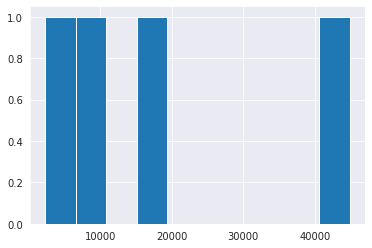

In [124]:
plt.hist(new_g['handgun']);

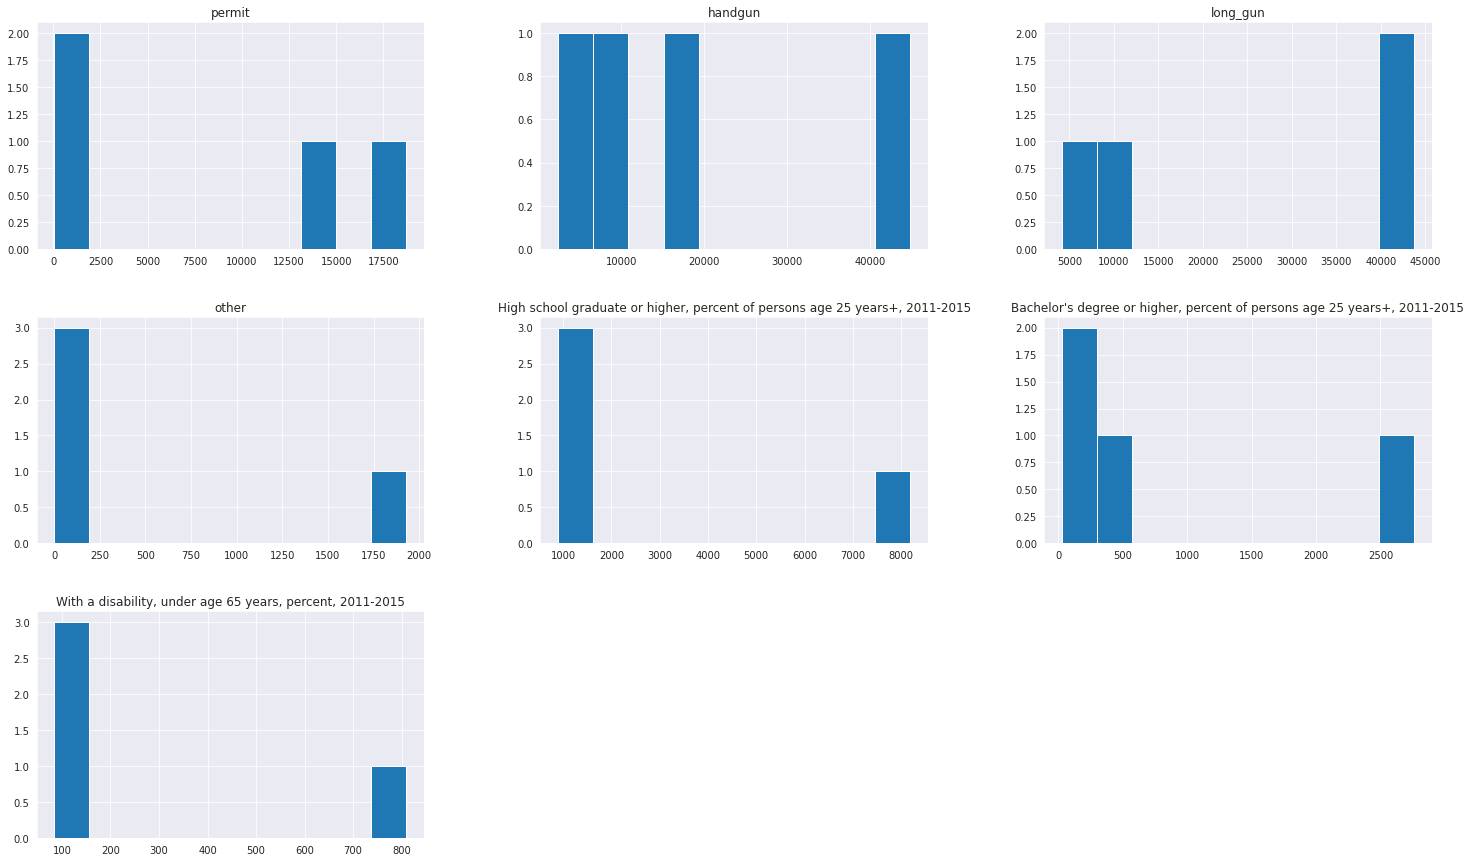

In [125]:
new_g.hist(figsize=(25,15));

### Based on region

### Classifying/Grouping state s to west, east...


np.repeat('red', len(red_df))
# create color array for red dataframe
color_red = np.repeat('red', len(red_df))
color_red
array(['red', 'red', 'red', ..., 'red', 'red', 'red'], 
      dtype='<U3')
.shape
white_df.shape
(4898, 12)
len(white_df)
4898

In [126]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [127]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [128]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [129]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!